### Assignment 1

#### Digit Recognition (MNIST)

#### Data preparation

In [1]:
import scipy.io

filename = "mnist_all.mat"

mat = scipy.io.loadmat(filename)
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'train0', 'test0', 'train1', 'test1', 'train2', 'test2', 'train3', 'test3', 'train4', 'test4', 'train5', 'test5', 'train6', 'test6', 'train7', 'test7', 'train8', 'test8', 'train9', 'test9'])

In [2]:
print(mat["train1"].shape)
print(mat["train2"].shape)
print(mat["train3"].shape)
print(mat["train4"].shape)
print(mat["train5"].shape)
print(mat["train6"].shape)
print(mat["train7"].shape)
print(mat["train8"].shape)
print(mat["train9"].shape)

print(mat["test0"].shape)
print(mat["test1"].shape)
print(mat["test2"].shape)
print(mat["test3"].shape)
print(mat["test4"].shape)
print(mat["test5"].shape)
print(mat["test6"].shape)
print(mat["test7"].shape)
print(mat["test8"].shape)
print(mat["test9"].shape)

print(mat["train1"][0].shape)

(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)
(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)
(784,)


In [3]:
from data_preprocessing_utils import create_train_test_datasets_mnist

data = mat.items()

x_train, y_train, x_test, y_test = create_train_test_datasets_mnist(data)

print("x_train.shape =", x_train.shape)
print("y_train.shape =", y_train.shape)
print("x_test.shape =", x_test.shape)
print("y_test.shape =", y_test.shape)

x_train.shape = (60000, 784)
y_train.shape = (60000,)
x_test.shape = (10000, 784)
y_test.shape = (10000,)


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

Train & Test datasets class distribution

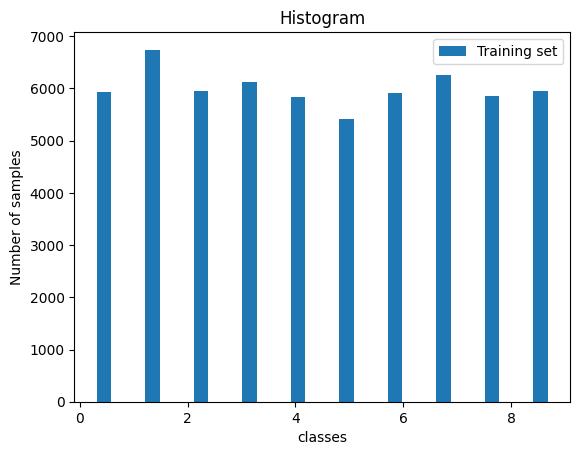

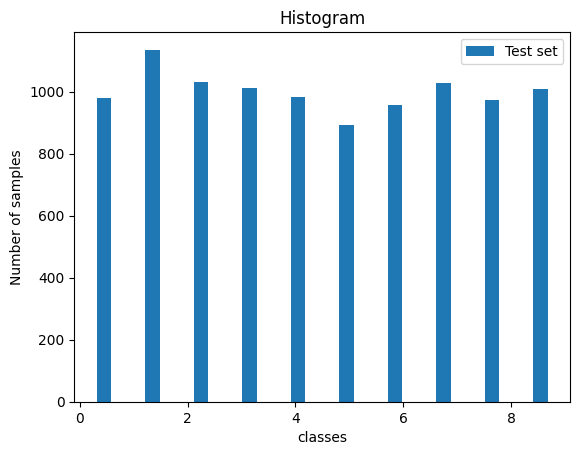

In [5]:
from matplotlib import pyplot as plt

plt.hist(y_train, label="Training set", rwidth=0.3)
plt.title("Histogram")
plt.ylabel("Number of samples")
plt.xlabel("classes")
plt.legend()
plt.show()

plt.hist(y_test, label="Test set", rwidth=0.3)
plt.title("Histogram")
plt.ylabel("Number of samples")
plt.xlabel("classes")
plt.legend()
plt.show()

#### Dimensionality reduction

There is a reduction of dimensions with the PCA technique while maintaining 90% of the distribution. The dimension of the data is reduced from 784 to 87.

In [6]:
from sklearn import decomposition

# TODO: Analyze how PCA works with sklearn (the arguments and the return values)
pca = decomposition.PCA(n_components=0.9, svd_solver="full", random_state=0)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

print("x_train_final.shape =", x_train.shape)
print("x_test.shape =", x_test.shape)

x_train_final.shape = (60000, 87)
x_test.shape = (10000, 87)


#### Model evaluation

`grid_search` performs K-fold cross validation & evaluates for various parameter values. 

Accuracy is chosen as the evaluation metric, because the classes are weighted.

`plot_grid_search` generates plots for accuracy and training time. 

`evaluate_model` retrains the best model on the entire training set and evaluates it on the test set.

In [7]:
final_results = []

##### Linear Kernel (C)

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [8]:
from sklearn import svm
from model_training_utils import grid_search


param_dict = {"C": (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0)}

model = svm.SVC(kernel="linear")
results = grid_search(model, param_dict, x_train, y_train)

[1/7] {'C': 0.001}: train_acc = 0.9221, val_acc = 0.9203 | t = 23.0 sec = 0.4 min
[2/7] {'C': 0.005}: train_acc = 0.9353, val_acc = 0.9319 | t = 11.7 sec = 0.2 min
[3/7] {'C': 0.01}: train_acc = 0.9387, val_acc = 0.9351 | t = 11.0 sec = 0.2 min
[4/7] {'C': 0.05}: train_acc = 0.9447, val_acc = 0.9384 | t = 9.4 sec = 0.2 min
[5/7] {'C': 0.1}: train_acc = 0.9466, val_acc = 0.9390 | t = 10.0 sec = 0.2 min
[6/7] {'C': 0.5}: train_acc = 0.9486, val_acc = 0.9388 | t = 11.6 sec = 0.2 min
[7/7] {'C': 1.0}: train_acc = 0.9494, val_acc = 0.9383 | t = 16.5 sec = 0.3 min
Best params = {'C': 0.1}
Maximum validation accuracy = 0.9390000000000001


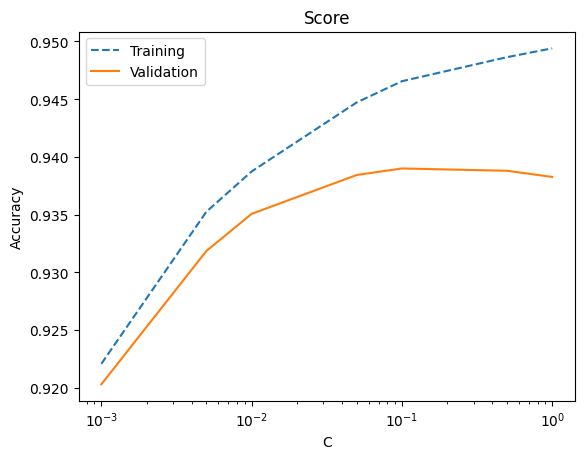

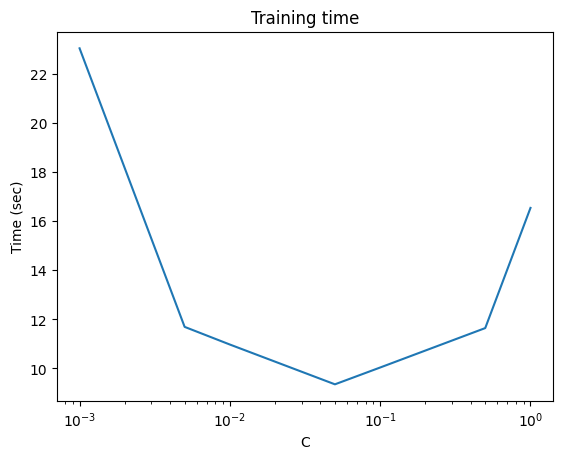

In [9]:
from model_training_utils import plot_grid_search

plot_grid_search(results, "C", None, "log")

In [10]:
from model_training_utils import evaluate_model

res = evaluate_model(
    "Linear SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 0.1}
Training time = 12.8 sec = 0.2 min
Training accuracy = 0.9462333333333334
Test accuracy = 0.9426


##### Polynomial Kernel (C, degree)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = (\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r)^d $

In [11]:
from sklearn import svm

param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0), "degree": (2, 3, 4, 5)}

model = svm.SVC(kernel="poly")
results = grid_search(model, param_dict, x_train, y_train)

[1/28] {'C': 0.001, 'degree': 2}: train_acc = 0.4468, val_acc = 0.4464 | t = 191.4 sec = 3.2 min
[2/28] {'C': 0.001, 'degree': 3}: train_acc = 0.2270, val_acc = 0.2264 | t = 182.4 sec = 3.0 min
[3/28] {'C': 0.001, 'degree': 4}: train_acc = 0.1599, val_acc = 0.1594 | t = 173.4 sec = 2.9 min
[4/28] {'C': 0.001, 'degree': 5}: train_acc = 0.1533, val_acc = 0.1529 | t = 147.4 sec = 2.5 min
[5/28] {'C': 0.01, 'degree': 2}: train_acc = 0.9232, val_acc = 0.9210 | t = 63.8 sec = 1.1 min
[6/28] {'C': 0.01, 'degree': 3}: train_acc = 0.8930, val_acc = 0.8902 | t = 102.1 sec = 1.7 min
[7/28] {'C': 0.01, 'degree': 4}: train_acc = 0.7429, val_acc = 0.7369 | t = 136.8 sec = 2.3 min
[8/28] {'C': 0.01, 'degree': 5}: train_acc = 0.5867, val_acc = 0.5793 | t = 161.7 sec = 2.7 min
[9/28] {'C': 0.1, 'degree': 2}: train_acc = 0.9706, val_acc = 0.9659 | t = 28.2 sec = 0.5 min
[10/28] {'C': 0.1, 'degree': 3}: train_acc = 0.9720, val_acc = 0.9654 | t = 38.3 sec = 0.6 min
[11/28] {'C': 0.1, 'degree': 4}: train_a

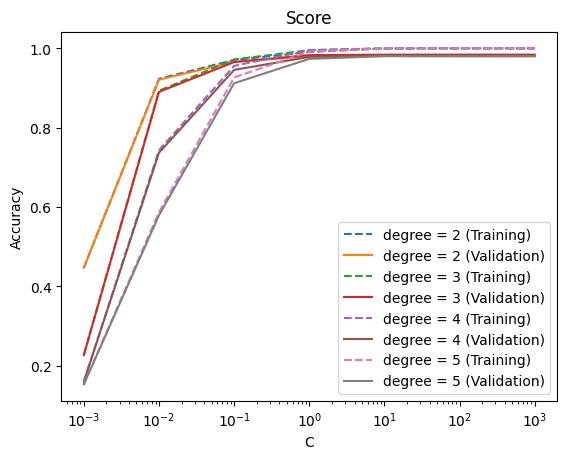

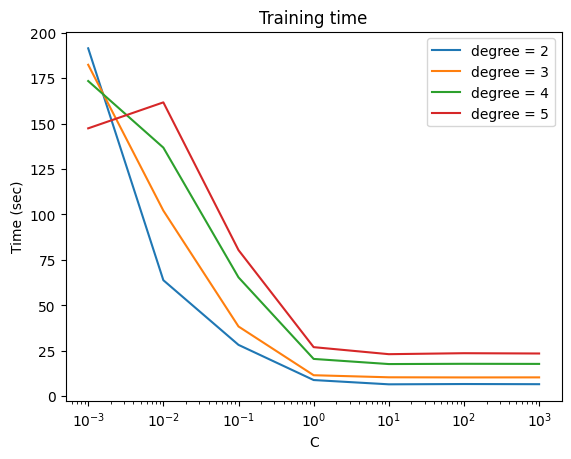

In [12]:
plot_grid_search(results, "C", "degree", "log")

In [13]:
res = evaluate_model(
    "Polynomial SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 100.0, 'degree': 3}
Training time = 14.9 sec = 0.2 min
Training accuracy = 1.0
Test accuracy = 0.9834


##### RBF Kernel (C, gamma)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [14]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.01, 0.1, 1.0)}

model = svm.SVC(kernel="rbf")
results = grid_search(model, param_dict, x_train, y_train)

[1/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.5671, val_acc = 0.5668 | t = 152.8 sec = 2.5 min
[2/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.1124, val_acc = 0.1124 | t = 153.2 sec = 2.6 min
[3/18] {'C': 0.001, 'gamma': 1.0}: train_acc = 0.1124, val_acc = 0.1124 | t = 130.8 sec = 2.2 min
[4/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.9078, val_acc = 0.9069 | t = 59.5 sec = 1.0 min
[5/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.2978, val_acc = 0.2957 | t = 148.7 sec = 2.5 min
[6/18] {'C': 0.01, 'gamma': 1.0}: train_acc = 0.1124, val_acc = 0.1124 | t = 156.3 sec = 2.6 min
[7/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9528, val_acc = 0.9503 | t = 18.8 sec = 0.3 min
[8/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.9050, val_acc = 0.8708 | t = 89.7 sec = 1.5 min
[9/18] {'C': 0.1, 'gamma': 1.0}: train_acc = 0.1124, val_acc = 0.1124 | t = 191.0 sec = 3.2 min
[10/18] {'C': 1.0, 'gamma': 0.01}: train_acc = 0.9820, val_acc = 0.9748 | t = 8.1 sec = 0.1 min
[11/18] {'C': 1.0, 'gamma': 0.1

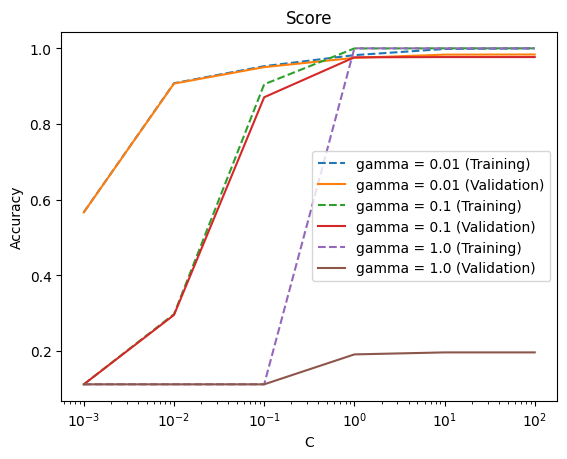

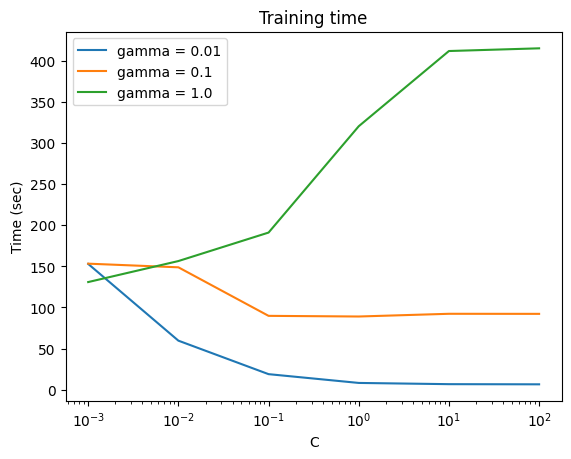

In [15]:
plot_grid_search(results, "C", "gamma", "log")

In [16]:
res = evaluate_model(
    "RBF SVM", model, results["best_params"], x_train, y_train, x_test, y_test
)
final_results.append(res)

Training on the original training set with params = {'C': 100.0, 'gamma': 0.01}
Training time = 10.1 sec = 0.2 min
Training accuracy = 0.9999833333333333
Test accuracy = 0.9843


##### MLP Kernel (C, gamma)

Kernel: $ K(\mathbf{x}, \mathbf{x}') = tanh(\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r) $

In [17]:
param_dict = {"C": (0.001, 0.01, 0.1, 1.0, 10.0, 100.0), "gamma": (0.001, 0.01, 0.1)}

model = svm.SVC(kernel="sigmoid")
results = grid_search(model, param_dict, x_train, y_train)

[1/18] {'C': 0.001, 'gamma': 0.001}: train_acc = 0.1124, val_acc = 0.1124 | t = 160.1 sec = 2.7 min
[2/18] {'C': 0.001, 'gamma': 0.01}: train_acc = 0.5719, val_acc = 0.5718 | t = 157.3 sec = 2.6 min
[3/18] {'C': 0.001, 'gamma': 0.1}: train_acc = 0.7192, val_acc = 0.7189 | t = 108.4 sec = 1.8 min
[4/18] {'C': 0.01, 'gamma': 0.001}: train_acc = 0.5809, val_acc = 0.5811 | t = 158.1 sec = 2.6 min
[5/18] {'C': 0.01, 'gamma': 0.01}: train_acc = 0.8803, val_acc = 0.8798 | t = 61.7 sec = 1.0 min
[6/18] {'C': 0.01, 'gamma': 0.1}: train_acc = 0.5550, val_acc = 0.5578 | t = 53.2 sec = 0.9 min
[7/18] {'C': 0.1, 'gamma': 0.001}: train_acc = 0.8837, val_acc = 0.8831 | t = 60.9 sec = 1.0 min
[8/18] {'C': 0.1, 'gamma': 0.01}: train_acc = 0.9167, val_acc = 0.9158 | t = 22.3 sec = 0.4 min
[9/18] {'C': 0.1, 'gamma': 0.1}: train_acc = 0.4776, val_acc = 0.4813 | t = 37.2 sec = 0.6 min
[10/18] {'C': 1.0, 'gamma': 0.001}: train_acc = 0.9220, val_acc = 0.9203 | t = 21.4 sec = 0.4 min
[11/18] {'C': 1.0, 'gamma

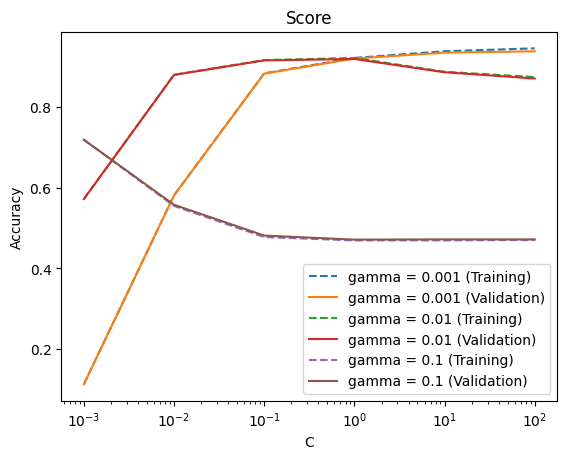

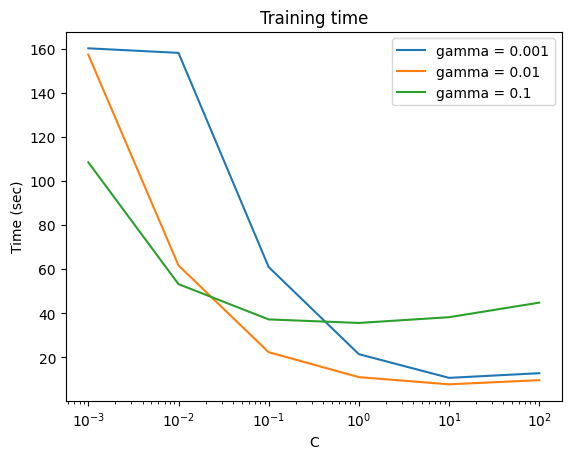

In [18]:
plot_grid_search(results, "C", "gamma", "log")

In [19]:
res = evaluate_model(
    "Sigmoid SVM",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'C': 100.0, 'gamma': 0.001}
Training time = 13.6 sec = 0.2 min
Training accuracy = 0.9453666666666667
Test accuracy = 0.9419


##### Nearest Neighbors

$d_p(\mathbf{x}, \mathbf{y}) = \sqrt[p]{\sum_{i}|x_i-y_i|^p}$

In [20]:
from sklearn import neighbors

param_dict = {"n_neighbors": (1, 2, 5, 10), "p": (1, 2, 3)}

model = neighbors.KNeighborsClassifier()
results = grid_search(model, param_dict, x_train, y_train)

[1/12] {'n_neighbors': 1, 'p': 1}: train_acc = 1.0000, val_acc = 0.9716 | t = 0.0 sec = 0.0 min
[2/12] {'n_neighbors': 1, 'p': 2}: train_acc = 1.0000, val_acc = 0.9750 | t = 0.0 sec = 0.0 min
[3/12] {'n_neighbors': 1, 'p': 3}: train_acc = 1.0000, val_acc = 0.9747 | t = 0.0 sec = 0.0 min
[4/12] {'n_neighbors': 2, 'p': 1}: train_acc = 0.9847, val_acc = 0.9647 | t = 0.0 sec = 0.0 min
[5/12] {'n_neighbors': 2, 'p': 2}: train_acc = 0.9870, val_acc = 0.9701 | t = 0.0 sec = 0.0 min
[6/12] {'n_neighbors': 2, 'p': 3}: train_acc = 0.9876, val_acc = 0.9703 | t = 0.0 sec = 0.0 min
[7/12] {'n_neighbors': 5, 'p': 1}: train_acc = 0.9805, val_acc = 0.9698 | t = 0.0 sec = 0.0 min
[8/12] {'n_neighbors': 5, 'p': 2}: train_acc = 0.9830, val_acc = 0.9747 | t = 0.0 sec = 0.0 min
[9/12] {'n_neighbors': 5, 'p': 3}: train_acc = 0.9834, val_acc = 0.9748 | t = 0.0 sec = 0.0 min
[10/12] {'n_neighbors': 10, 'p': 1}: train_acc = 0.9724, val_acc = 0.9655 | t = 0.0 sec = 0.0 min
[11/12] {'n_neighbors': 10, 'p': 2}: t

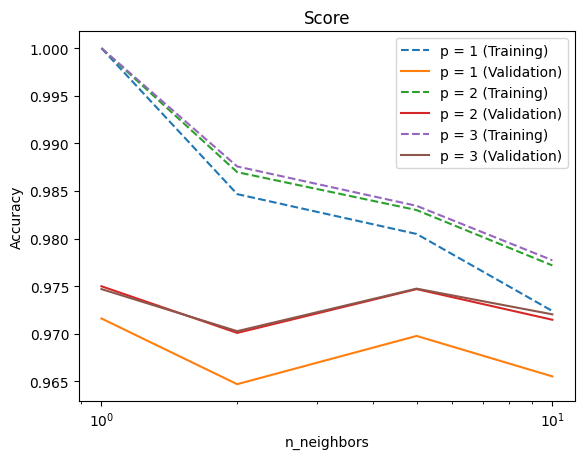

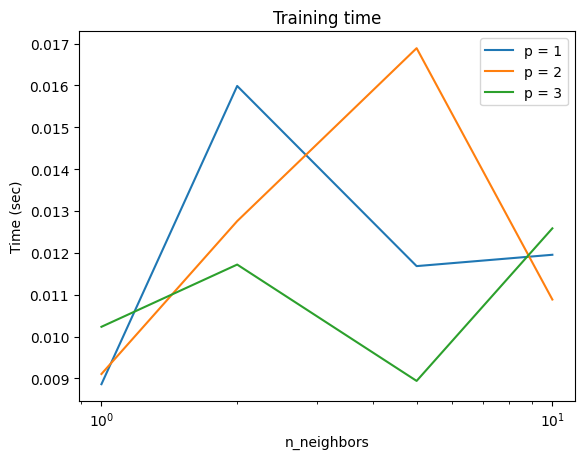

In [21]:
plot_grid_search(results, "n_neighbors", "p", "log")

In [22]:
res = evaluate_model(
    "Nearest Neighbors",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'n_neighbors': 1, 'p': 2}
Training time = 0.0 sec = 0.0 min
Training accuracy = 1.0
Test accuracy = 0.9734


##### Nearest Class Centroid

In [23]:
param_dict = {"shrink_threshold": (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)}

model = neighbors.NearestCentroid()
results = grid_search(model, param_dict, x_train, y_train)

[1/10] {'shrink_threshold': 0.1}: train_acc = 0.8072, val_acc = 0.8062 | t = 0.2 sec = 0.0 min
[2/10] {'shrink_threshold': 0.2}: train_acc = 0.8070, val_acc = 0.8060 | t = 0.1 sec = 0.0 min
[3/10] {'shrink_threshold': 0.3}: train_acc = 0.8067, val_acc = 0.8058 | t = 0.1 sec = 0.0 min
[4/10] {'shrink_threshold': 0.4}: train_acc = 0.8065, val_acc = 0.8057 | t = 0.1 sec = 0.0 min
[5/10] {'shrink_threshold': 0.5}: train_acc = 0.8063, val_acc = 0.8056 | t = 0.1 sec = 0.0 min
[6/10] {'shrink_threshold': 0.6}: train_acc = 0.8061, val_acc = 0.8054 | t = 0.1 sec = 0.0 min
[7/10] {'shrink_threshold': 0.7}: train_acc = 0.8058, val_acc = 0.8053 | t = 0.1 sec = 0.0 min
[8/10] {'shrink_threshold': 0.8}: train_acc = 0.8056, val_acc = 0.8053 | t = 0.1 sec = 0.0 min
[9/10] {'shrink_threshold': 0.9}: train_acc = 0.8055, val_acc = 0.8049 | t = 0.1 sec = 0.0 min
[10/10] {'shrink_threshold': 1.0}: train_acc = 0.8053, val_acc = 0.8050 | t = 0.1 sec = 0.0 min
Best params = {'shrink_threshold': 0.1}
Maximum v

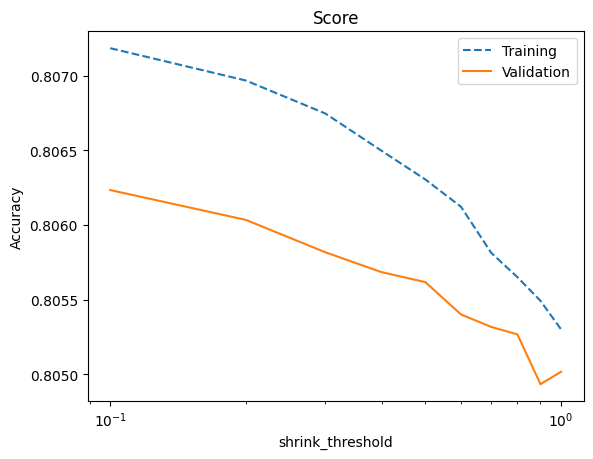

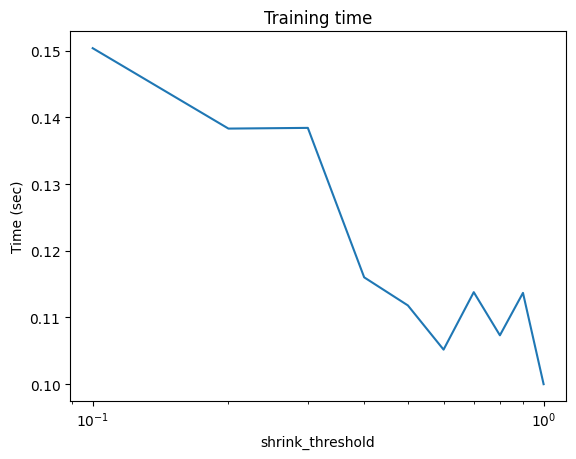

In [24]:
plot_grid_search(results, "shrink_threshold", None, "log")

In [25]:
res = evaluate_model(
    "Nearest Class Centroid",
    model,
    results["best_params"],
    x_train,
    y_train,
    x_test,
    y_test,
)
final_results.append(res)

Training on the original training set with params = {'shrink_threshold': 0.1}
Training time = 0.1 sec = 0.0 min
Training accuracy = 0.8071333333333334
Test accuracy = 0.8194


##### Results summary

In [26]:
import pandas as pd

final_results_df = pd.DataFrame(final_results)
print(final_results_df)

               Classifier                    Parameters Training Accuracy  \
0              Linear SVM                    C = 0.1000            0.9462   
1          Polynomial SVM      C = 100.0000, degree = 3            1.0000   
2                 RBF SVM  C = 100.0000, gamma = 0.0100            1.0000   
3             Sigmoid SVM  C = 100.0000, gamma = 0.0010            0.9454   
4       Nearest Neighbors        n_neighbors = 1, p = 2            1.0000   
5  Nearest Class Centroid     shrink_threshold = 0.1000            0.8071   

  Test Accuracy Training Time (sec)  
0        0.9426                12.8  
1        0.9834                14.9  
2        0.9843                10.1  
3        0.9419                13.6  
4        0.9734                 0.0  
5        0.8194                 0.1  
